In [2]:
# http://chrisalbon.com/python/matplotlib_plot_points_on_map.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline
from math import sqrt


In [3]:
train = pd.read_csv("data/train.csv",parse_dates = ['Dates'], date_parser = pd.datetools.to_datetime)
print train.head()
# raw_data = {'latitude': [37.7745, 37.7745, 37.8004, 37.8008, 37.7715],
#             'longitude': [-122.4258, -122.4258, -122.4243, -122.4269,-122.4387]}
# df = pd.DataFrame(raw_data, columns = ['latitude', 'longitude'])
# df

                Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37

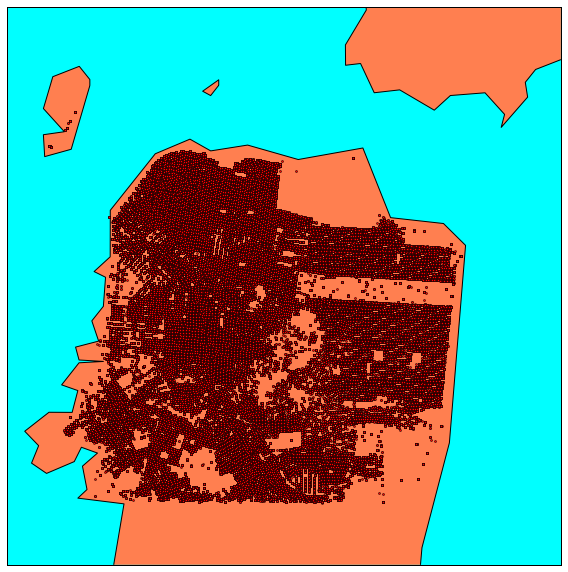

In [4]:
# Create a figure of size (i.e. pretty big)
fig = plt.figure(figsize=(20,10))

# Create a map, using the Gall–Peters projection, 
map = Basemap(projection='tmerc', 
              # with low resolution,
              resolution = 'h', 
              # And threshold 100000
              area_thresh = 0.1,
              # Centered at 0,0 (i.e null island)
              lat_0=37.75, lon_0=-122.45,
              # Dimensions of SF area - box
              llcrnrlon=-122.35, llcrnrlat=37.69,
              urcrnrlon=-122.55, urcrnrlat=37.85)


# Draw country borders on the map
# map.drawcountries()

# Draw the map boundaries
map.drawmapboundary(fill_color='aqua')


# Fill the land with grey
map.fillcontinents(color = 'coral', lake_color='aqua')

# Draw the coastlines on the map
map.drawcoastlines()


# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
# x,y = map(df['longitude'].values, df['latitude'].values)

x,y = map(train['X'].values, train['Y'].values)

# Plot them using round markers of size 6
map.plot(x, y, 'ro', markersize=2)

# Show the map
plt.show()

In [5]:
train.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [17]:
train['Category'].unique()
print type(train)

<class 'pandas.core.frame.DataFrame'>


In [8]:
train.loc[train['Category'] == 'PROSTITUTION'].head()


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
426,2015-05-12 19:44:00,PROSTITUTION,ENGAGING IN LEWD CONDUCT - PROSTITUTION RELATED,Tuesday,RICHMOND,"ARREST, BOOKED",500 Block of 14TH AV,-122.472708,37.777753
971,2015-05-11 12:00:00,PROSTITUTION,HUMAN TRAFFICKING,Monday,BAYVIEW,NONE,200 Block of WILLIAMS AV,-122.397744,37.729935
2251,2015-04-30 23:55:00,PROSTITUTION,SOLICITS FOR ACT OF PROSTITUTION,Thursday,NORTHERN,"ARREST, BOOKED",1500 Block of VANNESS AV,-122.422063,37.789920
2253,2015-04-30 23:55:00,PROSTITUTION,LOITERING FOR PURPOSE OF PROSTITUTION,Thursday,NORTHERN,"ARREST, BOOKED",1500 Block of VANNESS AV,-122.422063,37.789920
2262,2015-04-30 23:00:00,PROSTITUTION,SOLICITS FOR ACT OF PROSTITUTION,Thursday,NORTHERN,"ARREST, BOOKED",1500 Block of VANNESS AV,-122.422063,37.789920


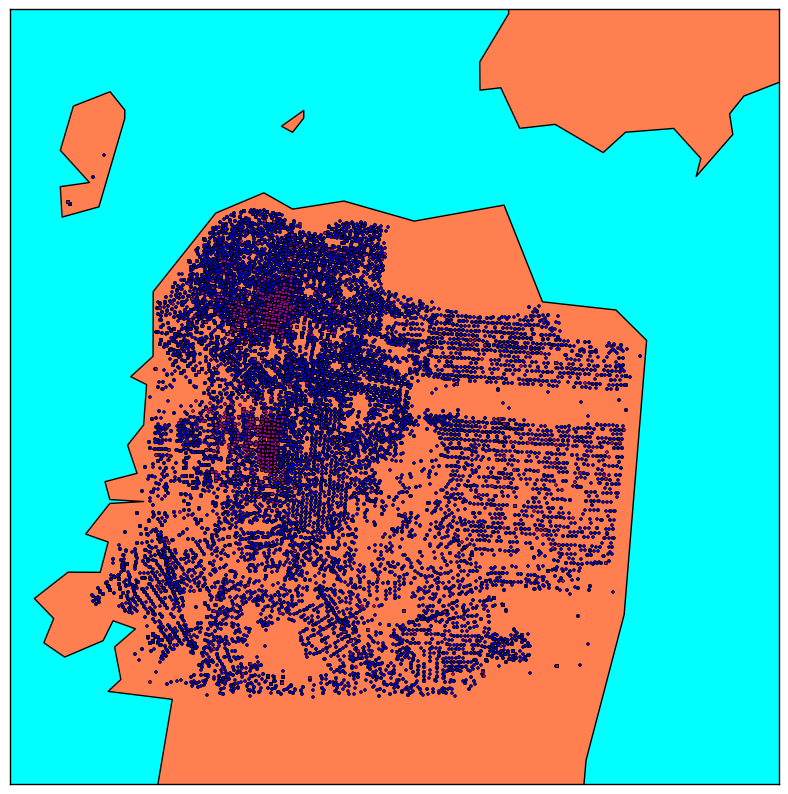

In [30]:
# Create a figure of size 
fig = plt.figure(figsize=(20,10))

# Create a map, using the Gall–Peters projection, 
map = Basemap(projection='tmerc', 
              # with low resolution,
              resolution = 'h', 
              # And threshold 100000
              area_thresh = 0.1,
              # Centered at 0,0 (i.e null island)
              lat_0=37.75, lon_0=-122.45,
              # Dimensions of SF area - box
              llcrnrlon=-122.35, llcrnrlat=37.69,
              urcrnrlon=-122.55, urcrnrlat=37.85)


# Draw country borders on the map
# map.drawcountries()

# Draw the map boundaries
map.drawmapboundary(fill_color='aqua')


# Fill the land with grey
map.fillcontinents(color = 'coral', lake_color='aqua')

# Draw the coastlines on the map
map.drawcoastlines()


# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
# x,y = map(df['longitude'].values, df['latitude'].values)
# train.loc[train['Category'] == 'PROSTITUTION'].head()
# x,y = map(train['X'].values, train['Y'].values)
df = train.loc[train['Category'] == 'PROSTITUTION']
x,y = map(df['X'].values, df['Y'].values)

df2 = train.loc[train['Category'] == 'BURGLARY']
x2,y2 = map(df2['X'].values, df2['Y'].values)


# Plot them using round markers of size 6
map.plot(x2, y2, 'bo', markersize=2)
map.plot(x, y, 'mo', markersize=2)

# Show the map
plt.show()

0 WARRANTS 42214 37.7789906923 -122.41758133 142.412919077
1 OTHER OFFENSES 126182 37.7709566436 -122.420874069 207.770617256
2 LARCENY/THEFT 174900 37.7779461609 -122.422445565 195.159778981
3 VEHICLE THEFT 53781 37.7683286456 -122.429060385 151.169750748
4 VANDALISM 44725 37.7646483649 -122.426360221 50.8935565356
5 NON-CRIMINAL 92304 37.7720227439 -122.424044898 101.030566255
6 ROBBERY 23000 37.7662588845 -122.420757014 50.5386991249
7 ASSAULT 76876 37.7665952441 -122.421061646 101.074157866
8 WEAPON LAWS 8555 37.7587339487 -122.418982863 3.44065763832
9 BURGLARY 36755 37.7694639197 -122.426357474 50.7311421682
10 SUSPICIOUS OCC 31414 37.7679509586 -122.424745453 71.4305121099
11 DRUNKENNESS 4280 37.7710296486 -122.421437573 1.85320113428
12 FORGERY/COUNTERFEITING 10609 37.7674313847 -122.425522105 3.23500577015
13 DRUG/NARCOTIC 53971 37.7709684052 -122.417633385 5.84733228397
14 STOLEN PROPERTY 4540 37.7816344959 -122.420791516 50.3424257701
15 SECONDARY CODES 9985 37.7590353659 -1

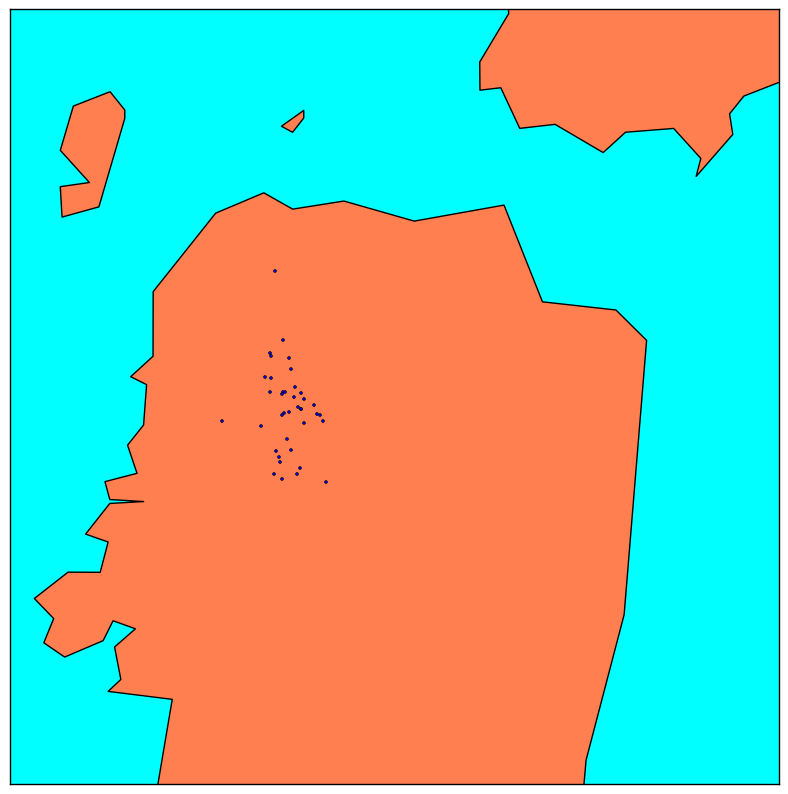

In [29]:
# Create list of unique crimer categories (39)
uniq_category = train['Category'].unique()

# Create Series (vectors)
list_category = []
list_lat_mean = []
list_lon_mean = []
list_size = []
list_dist_mean = []
list_dist_std = []

# Display category, number of rows, latitude, and longitude
for i in range(len(uniq_category)):
    list_category.append(uniq_category[i])
    
    size = len(train.loc[train['Category'] == uniq_category[i]])
    list_size.append(size)
    
    lat_mean = np.mean(train.loc[train['Category'] == uniq_category[i]].Y)
    lon_mean = np.mean(train.loc[train['Category'] == uniq_category[i]].X)
    list_lat_mean.append(lat_mean)
    list_lon_mean.append(lon_mean)
    
    dy = (train.loc[train['Category'] == uniq_category[i]].Y - lat_mean)
    dx = (train.loc[train['Category'] == uniq_category[i]].X - lon_mean)
    dist = sqrt(sum((dy - dx)**2 for dy, dx in zip(dy,dx)))
    list_dist_mean.append(dist)

for i in range(len(uniq_category)):    
    print i, list_category[i], list_size[i], list_lat_mean[i], list_lon_mean[i], list_dist_mean[i]
    
# Create a figure of size 
fig = plt.figure(figsize=(20,10))

# Create a map, using the Gall–Peters projection, 
map = Basemap(projection='tmerc', 
              # with low resolution,
              resolution = 'h', 
              # And threshold 100000
              area_thresh = 0.1,
              # Centered at 0,0 (i.e null island)
              lat_0=37.75, lon_0=-122.45,
              # Dimensions of SF area - box
              llcrnrlon=-122.35, llcrnrlat=37.69,
              urcrnrlon=-122.55, urcrnrlat=37.85)

# Draw the map boundaries
map.drawmapboundary(fill_color='aqua')


# Fill the land with grey
map.fillcontinents(color = 'coral', lake_color='aqua')

# Draw the coastlines on the map
map.drawcoastlines()

# Define our longitude and latitude points
x,y = map(pd.Series(list_lon_mean).values, pd.Series(list_lat_mean).values)


# Plot them using round markers of size 6
map.plot(x, y, 'bo', markersize=2)

# Show the map
plt.show()    

In [27]:
a = [2, 4, 3, 6, 5, 4]
print a
print pd.Series(a).values
# print type(train['Category'])


[2, 4, 3, 6, 5, 4]
[2 4 3 6 5 4]
